Problem Defination:This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

import all necessary libriries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

load data set

In [2]:
ds=pd.read_csv('loan.csv')

In [3]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking Data types

In [5]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

data set have  input features of object and float type and target variable isobject data type

In [6]:
ds.shape

(614, 13)

data set have 614 rows and 13 columns

# Checking missing values

In [7]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

data set have some columns which have missing values, we have filled it

<AxesSubplot:>

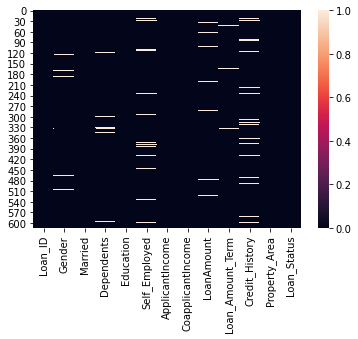

In [8]:
sns.heatmap(ds.isnull())

above heatmap shows that there are missing values in data set

# Stastical Summary

In [9]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking Correlation

In [10]:
ds.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

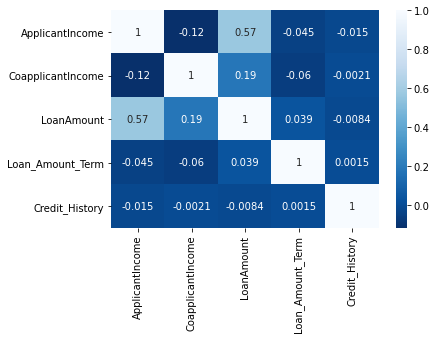

In [11]:
sns.heatmap(ds.corr(),annot=True,cmap='Blues_r')

Above heatmapshows the corelation between different varibales

# Visualazation of categorical data

Male      489
Female    112
Name: Gender, dtype: int64


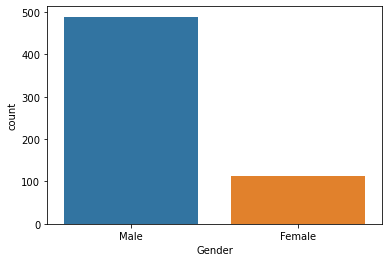

In [12]:
sns.countplot(ds['Gender'])
print(ds['Gender'].value_counts())

above countplot shows that there are more male candidates than female

Yes    398
No     213
Name: Married, dtype: int64


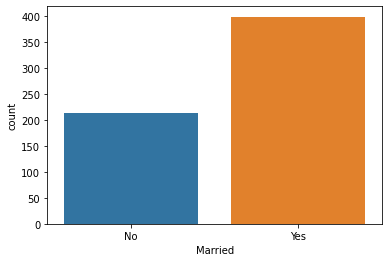

In [13]:
sns.countplot(ds['Married'])
print(ds['Married'].value_counts())

above countplot shows that how many people are married and unmmaried

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


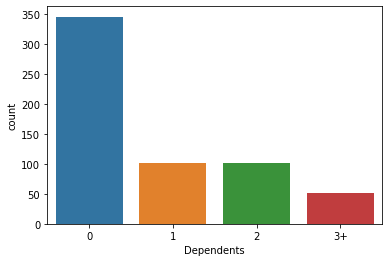

In [14]:
sns.countplot(ds['Dependents'])
print(ds['Dependents'].value_counts())

above counting of countplot shows  number of  dependents on person

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


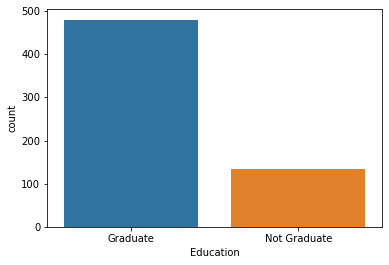

In [15]:
sns.countplot(ds['Education'])
print(ds['Education'].value_counts())

above countplot shows that how many people are graduate and non graduate

No     500
Yes     82
Name: Self_Employed, dtype: int64


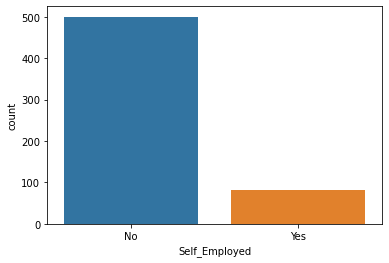

In [16]:
sns.countplot(ds['Self_Employed'])
print(ds['Self_Employed'].value_counts())

above countplot shows the how many are self employed

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


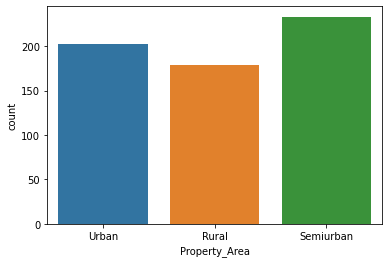

In [17]:
sns.countplot(ds['Property_Area'])
print(ds['Property_Area'].value_counts())

above countplot shows the 3 categories of property area

Y    422
N    192
Name: Loan_Status, dtype: int64


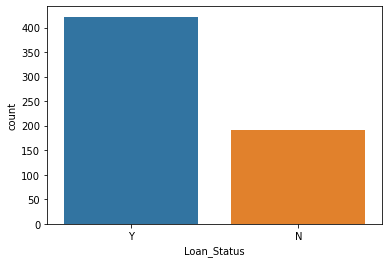

In [18]:
sns.countplot(ds['Loan_Status'])
print(ds['Loan_Status'].value_counts())

above counplot shows that there is class imbalance problem,we have to deal with it

# Visualazation of numerical data

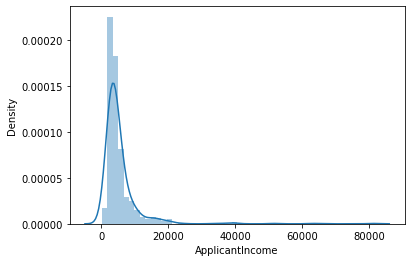

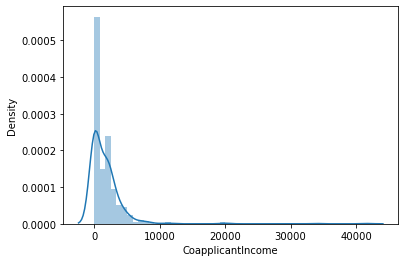

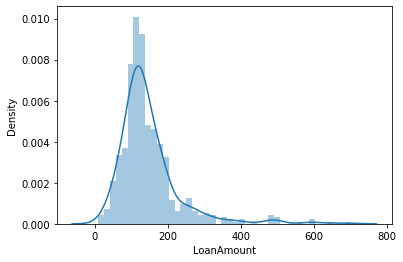

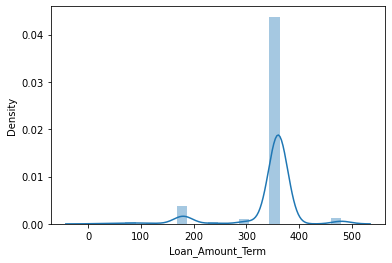

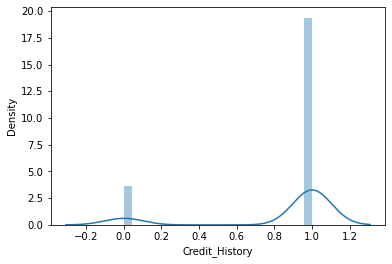

<Figure size 432x288 with 0 Axes>

In [19]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term',  'Credit_History']
for i in ds[cols]:
    sns.distplot(ds[i])
    plt.figure()

above distribution plots shows that there are some columns such as ApplicantIncome','CoapplicantIncome','LoanAmount have skewness

In [20]:
df=pd.DataFrame(ds)
df.head()  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


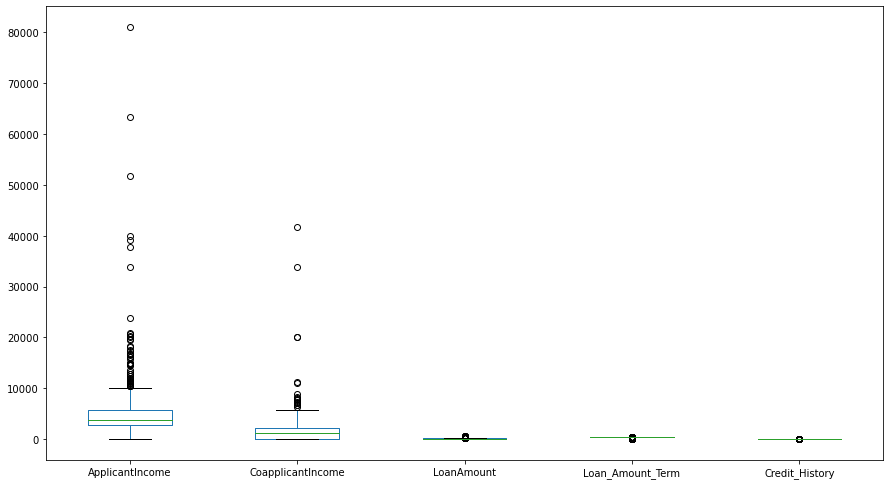

In [21]:
df.plot(kind='box',figsize=(15,10))
plt.subplots_adjust(bottom=0.25)

above boxplot shows that thereare som outliers present

# replacing missing values

In [22]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [23]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [24]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [25]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

above data columns are actegorical so filled missing values with the mode of that particular column

In [26]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [27]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [28]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

above data columns are numerical so filled missing values with mean and median of that particular column

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

after replacing missing values there is no missing value

<AxesSubplot:>

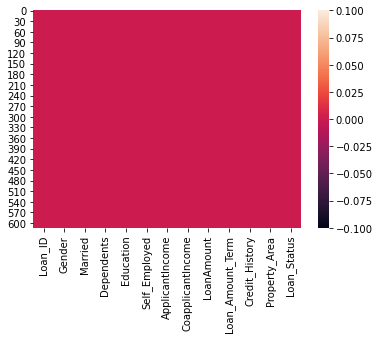

In [30]:
sns.heatmap(df.isnull())

above heatmapshows that there are no missing values now

# Encoded categorical data into numerical data

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [33]:
cols=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in df[cols]:
    df[i]=le.fit_transform(df[i])

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


encodede all categorical data numerical data

Stastical summary after encoding

In [35]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


checking corelation after encoding data

In [36]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.033028,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,-0.001665,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.007031,-0.046632,-0.033214
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.003546,-0.076120,-0.022549


<AxesSubplot:>

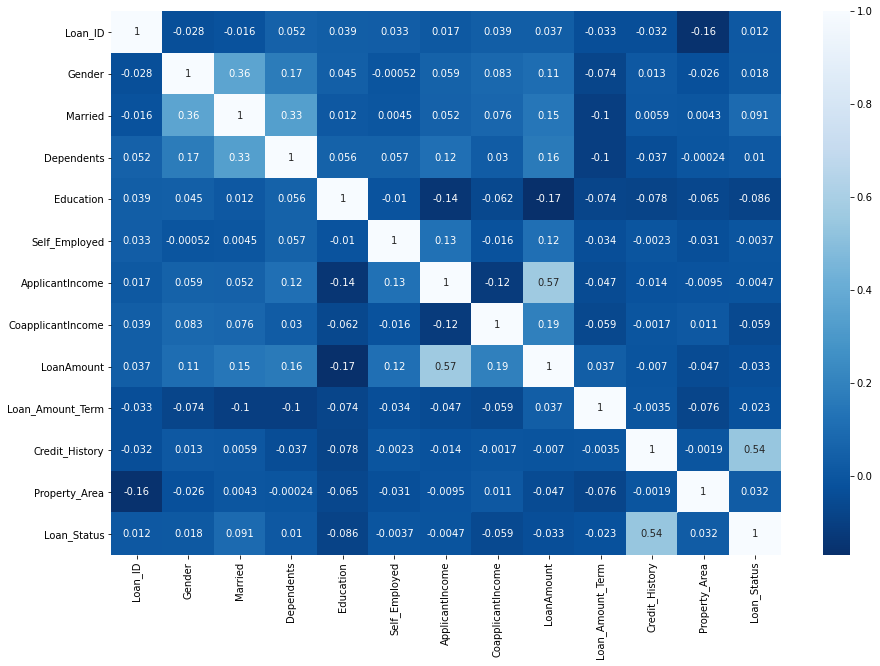

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues_r')

above heatmap shows the corelation between input variables and target variable

In [38]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [39]:
c1=['ApplicantIncome','CoapplicantIncome','LoanAmount']


removing skewness

In [40]:
for i in df[c1]:
    df[i]=np.log(1+df[i])

In [41]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [42]:
df2=df.iloc[:]

In [43]:
df2.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

divide data into input variables and target variable and dropped unnessary column

In [64]:
x=df.drop(['Loan_Status','Loan_ID'],axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,2
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2


In [65]:
y2=df['Loan_Status']

import Classification algorithmn 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

standarlized data using standard scaler

In [67]:
st=StandardScaler()
x_1=st.fit_transform(x)

In [68]:
x2=pd.DataFrame(x_1,columns=x.columns)
x2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.516186,-1.107783,-0.012803,0.273231,0.45164,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.137806,0.782158,-0.012803,0.273231,0.45164,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.519479,-1.107783,-1.348663,0.273231,0.45164,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.751605,0.897526,-0.143351,0.273231,0.45164,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.555727,-1.107783,0.182981,0.273231,0.45164,1.223298


handling class imbalance problem

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
sm=SMOTE()

In [71]:
x4,y4=sm.fit_resample(x2,y2)

In [72]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,2
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,360.0,1.0,0
610,1,1,3,0,0,8.320448,0.000000,3.713572,180.0,1.0,0
611,1,1,1,0,0,8.996280,5.484797,5.537334,360.0,1.0,2
612,1,1,2,0,0,8.933796,0.000000,5.236442,360.0,1.0,2


splitting data for training and testing

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x4,y4,test_size=.30,random_state=47)

In [74]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (590, 11)
shape of x_test (254, 11)
shape of y_train (590,)
shape of y_test (254,)


In [86]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
sv=SVR()
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier()

fit data into models and predict the output

In [87]:
list1=[lg,dtc,gnb,rf,ad]
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_score of ",i)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracy_score of  LogisticRegression()
0.7322834645669292
[[ 73  49]
 [ 19 113]]
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       122
           1       0.70      0.86      0.77       132

    accuracy                           0.73       254
   macro avg       0.75      0.73      0.73       254
weighted avg       0.74      0.73      0.73       254

accuracy_score of  DecisionTreeClassifier()
0.7637795275590551
[[98 24]
 [36 96]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       122
           1       0.80      0.73      0.76       132

    accuracy                           0.76       254
   macro avg       0.77      0.77      0.76       254
weighted avg       0.77      0.76      0.76       254

accuracy_score of  GaussianNB()
0.7283464566929134
[[ 57  65]
 [  4 128]]
              precision    recall  f1-score   support

           0       0.93      0.47      0.62       122

by observing above accuracy metrics ,random forest classifier gives the more accuracy than other models

# Checking cross_val_scores

In [88]:
for i in list1:
    scores=cross_val_score(i,x4,y4,cv=7)
    print('Cross_val_scores of',i)
    print('scores=',scores)
    print(scores.mean())

Cross_val_scores of LogisticRegression()
scores= [0.71900826 0.66942149 0.7768595  0.71900826 0.725      0.68333333
 0.7       ]
0.7132329791420701
Cross_val_scores of DecisionTreeClassifier()
scores= [0.67768595 0.66115702 0.7107438  0.80165289 0.84166667 0.78333333
 0.875     ]
0.7644628099173554
Cross_val_scores of GaussianNB()
scores= [0.70247934 0.65289256 0.76859504 0.73553719 0.74166667 0.70833333
 0.71666667]
0.7180243998425817
Cross_val_scores of RandomForestClassifier()
scores= [0.76033058 0.68595041 0.76033058 0.87603306 0.875      0.9
 0.89166667]
0.8213301849665486
Cross_val_scores of AdaBoostClassifier()
scores= [0.73553719 0.69421488 0.76033058 0.85123967 0.825      0.76666667
 0.75      ]
0.7689984258166076


by observing cross_val_scores and accuracy_scores, we concluded that randomforest classfier is best model

# ROC_AUC_CURVE

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

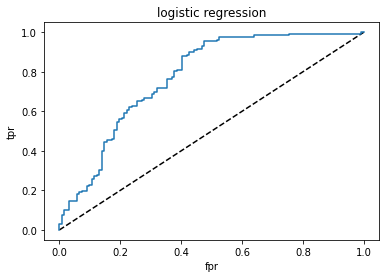

In [79]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("logistic regression")
plt.show()

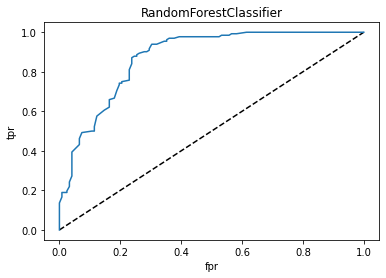

In [80]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()


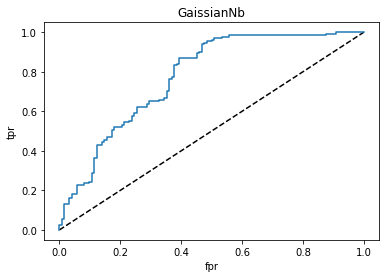

In [81]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaissianNb')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("GaissianNb")
plt.show()

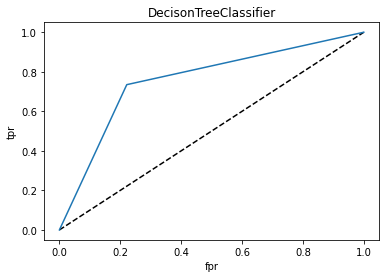

In [82]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisonTreeClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("DecisonTreeClassifier")
plt.show()


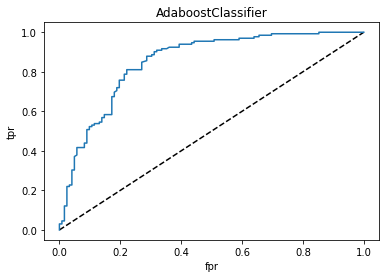

In [89]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AdaboostClassifier")
plt.show()


above auc curves shows the area under curves of different algorithms

# HyperParameterTunning

In [90]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [91]:
grid.best_score_ 

0.8152542372881356

In [92]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [93]:
rf1=RandomForestClassifier(bootstrap=False,max_features= 'sqrt',min_samples_split=8,n_estimators=30)
rf1.fit(x_train,y_train)
rpred=rf.predict(x_test)
cv3=cross_val_score(rf1,x4,y4,cv=5)
print("score",cv3)
print(cv3.mean())

print("accuracy_score=",accuracy_score(y_test,rpred))
print("Classification report=",classification_report(y_test,rpred))
print("confusion matrix",confusion_matrix(y_test,rpred))

score [0.74556213 0.77514793 0.85207101 0.85207101 0.875     ]
0.8199704142011834
accuracy_score= 0.8228346456692913
Classification report=               precision    recall  f1-score   support

           0       0.85      0.76      0.81       122
           1       0.80      0.88      0.84       132

    accuracy                           0.82       254
   macro avg       0.83      0.82      0.82       254
weighted avg       0.83      0.82      0.82       254

confusion matrix [[ 93  29]
 [ 16 116]]


creating object file of best model that is randomforestclassifier

In [94]:
import joblib

In [96]:
joblib.dump(rf,'Loan-prediction.obj')

['Loan-prediction.obj']

In [97]:
f1=joblib.load('Loan-prediction.obj')